In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
# Load the data from the provided CSV files
mouse_metadata = pd.read_csv(r'C:\Pymaceuticals\Mouse_metadata.csv')
study_results = pd.read_csv(r'C:\Pymaceuticals\Study_results.csv')


In [5]:
# Merge the mouse_metadata and study_results DataFrames into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

In [6]:
# Display the number of unique mice IDs in the data
unique_mice_count = merged_data["Mouse ID"].nunique()
print(f"Number of unique mice IDs: {unique_mice_count}")

Number of unique mice IDs: 249


In [7]:
# Check for any mouse ID with duplicate time points
duplicate_time_points = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

In [8]:
# Display the data associated with the mouse ID with duplicate time points
print("Data with duplicate time points:")
print(duplicate_time_points.sort_values(by=["Mouse ID", "Timepoint"]))

Data with duplicate time points:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0 

In [9]:
# Create a new DataFrame where this data is removed
cleaned_data = merged_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep=False)

In [10]:
# Display the updated number of unique mice IDs
updated_unique_mice_count = cleaned_data["Mouse ID"].nunique()
print(f"Updated number of unique mice IDs: {updated_unique_mice_count}")


Updated number of unique mice IDs: 249


In [11]:
# First, group the cleaned data by "Drug Regimen"
grouped_data = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]


In [14]:
# Calculate the desired statistics: mean, median, variance, standard deviation, and SEM
summary_stats = pd.DataFrame({
    "Mean": grouped_data.mean(),
    "Median": grouped_data.median(),
    "Variance": grouped_data.var(),
    "Standard Deviation": grouped_data.std(),
    "SEM": grouped_data.sem()
})



In [15]:
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.458254  50.854632  44.053659            6.637293  0.540135
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


In [16]:
# Bar Charts
# Calculate the total number of rows (Mouse ID/Timepoints) for each drug regimen
drug_counts = merged_data["Drug Regimen"].value_counts()

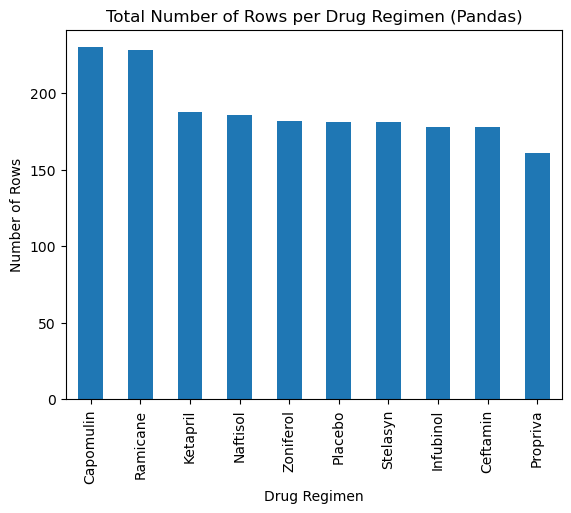

In [17]:
# First bar chart using Pandas DataFrame.plot() method
drug_counts.plot(kind='bar', title="Total Number of Rows per Drug Regimen (Pandas)", ylabel="Number of Rows")
plt.show()

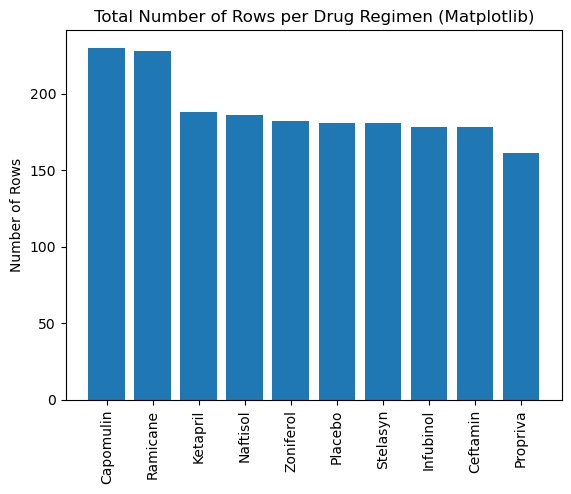

In [18]:
# Second bar chart using Matplotlib's pyplot methods
plt.bar(drug_counts.index, drug_counts.values)
plt.title("Total Number of Rows per Drug Regimen (Matplotlib)")
plt.ylabel("Number of Rows")
plt.xticks(rotation=90)
plt.show()

In [19]:
# Pie Charts
# Calculate the distribution of unique female versus male mice
gender_counts = mouse_metadata["Sex"].value_counts()


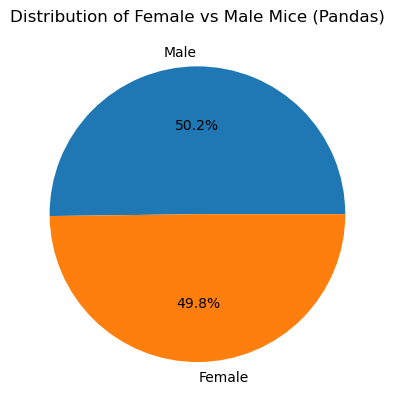

In [20]:
# First pie chart using Pandas DataFrame.plot() method
gender_counts.plot(kind='pie', title="Distribution of Female vs Male Mice (Pandas)", autopct='%1.1f%%')
plt.ylabel("")  # To remove the y-label from the pie chart
plt.show()

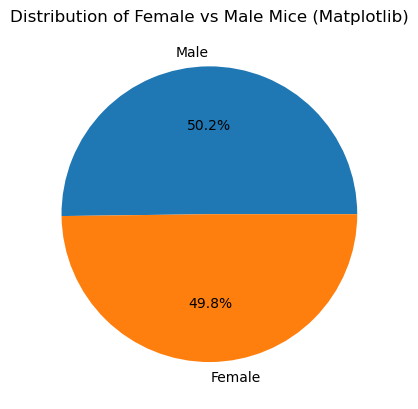

In [21]:
# Second pie chart using Matplotlib's pyplot methods
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title("Distribution of Female vs Male Mice (Matplotlib)")
plt.show()

In [23]:
#Create a grouped DataFrame that shows the last (greatest) time point for each mouse.
max_timepoint = cleaned_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

In [24]:
#Merge this grouped DataFrame with the original cleaned DataFrame.
merged_max = pd.merge(max_timepoint, cleaned_data, on=["Mouse ID", "Timepoint"])

In [25]:
#Create a list that holds the treatment names.
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

In [26]:
#Create an empty dictionary to hold the tumor volume data.
tumor_volumes = {treatment: [] for treatment in treatments}

In [27]:
#Loop through each drug in the treatment list.
for treatment in treatments:
    #Locate the rows in the merged DataFrame that correspond to each treatment.
    treatment_data = merged_max[merged_max["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    
    #Append the resulting final tumor volumes for each drug to the empty list.
    tumor_volumes[treatment] = treatment_data


In [28]:
#Determine outliers by using the upper and lower bounds.
outliers = {}
for treatment, volumes in tumor_volumes.items():
    quartiles = volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    #Determine if there are any outliers
    outliers[treatment] = volumes[(volumes < lower_bound) | (volumes > upper_bound)]

In [29]:
#Print the results
for treatment, data in outliers.items():
    if not data.empty:
        print(f"Outliers for {treatment}:")
        print(data)
    else:
        print(f"No outliers for {treatment}.")

No outliers for Capomulin.
No outliers for Ramicane.
Outliers for Infubinol:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
No outliers for Ceftamin.


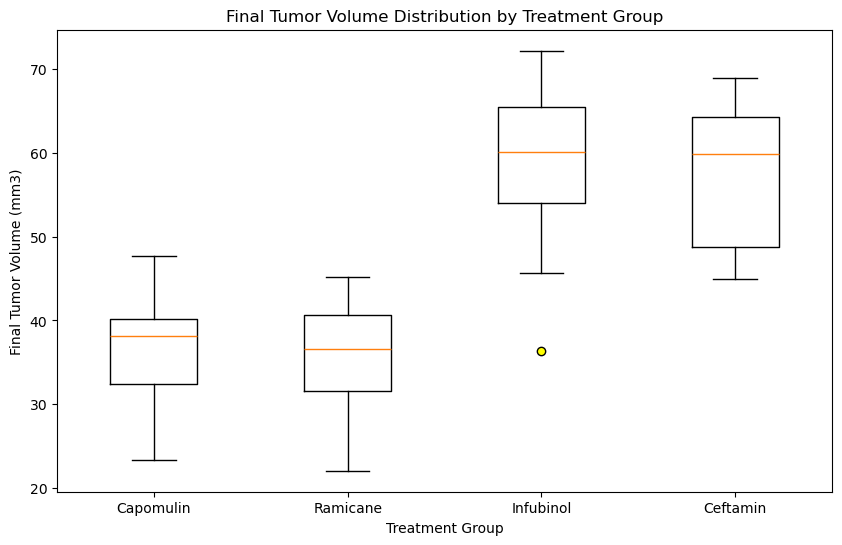

In [37]:
# Generate a list of tumor volume data for each treatment
data = [tumor_volumes[treatment] for treatment in treatments]

# Create a figure for the box plot
plt.figure(figsize=(10, 6))

# Create a box plot for all treatment groups in the same figure
plt.boxplot(data, labels=treatments, flierprops=dict(marker='o', color='red', markerfacecolor='yellow'))

# Add title and labels
plt.title('Final Tumor Volume Distribution by Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Final Tumor Volume (mm3)')

# Show the plot
plt.show()


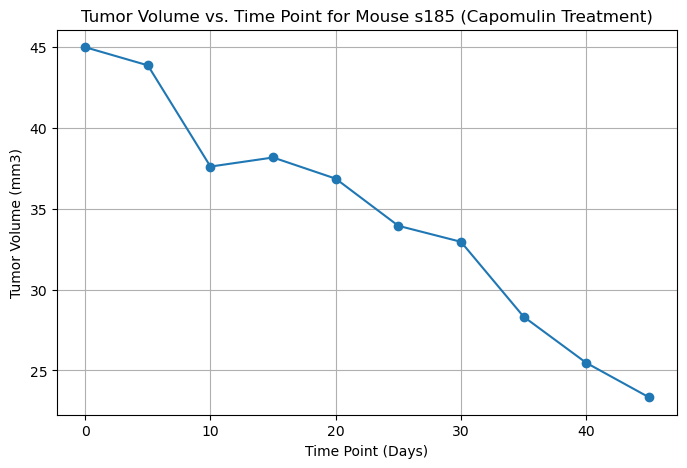

In [38]:
# Select a single mouse treated with Capomulin
# Replace 's185' with any specific Mouse ID if you know it, or select the first one from the dataset
mouse_id = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]["Mouse ID"].iloc[0]

# Filter the data for that specific mouse
mouse_data = cleaned_data[cleaned_data["Mouse ID"] == mouse_id]

# Generate a line plot of tumor volume versus time point for that mouse
plt.figure(figsize=(8, 5))
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker='o')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin Treatment)')
plt.xlabel('Time Point (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()


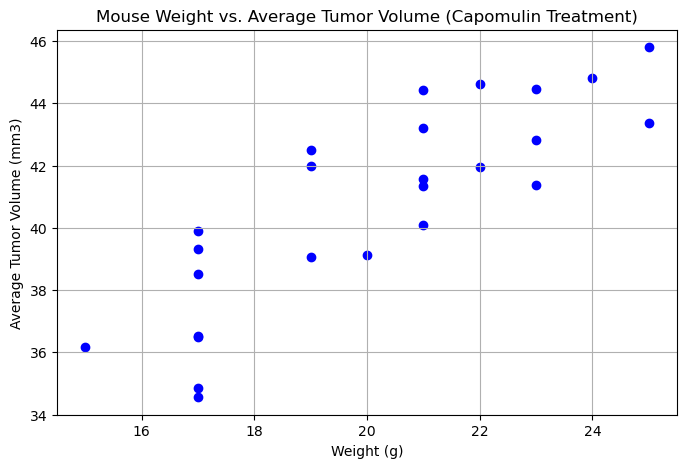

In [41]:
# Filter the data for the Capomulin treatment regimen
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]

# Group by Mouse ID to calculate the average tumor volume and weight per mouse
avg_tumor_volume = capomulin_data.groupby("Mouse ID")[["Weight (g)", "Tumor Volume (mm3)"]].mean()

# Generate the scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(avg_tumor_volume["Weight (g)"], avg_tumor_volume["Tumor Volume (mm3)"], color='blue')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Treatment)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)

# Show the plot
plt.show()


Correlation coefficient: 0.8419363424694722


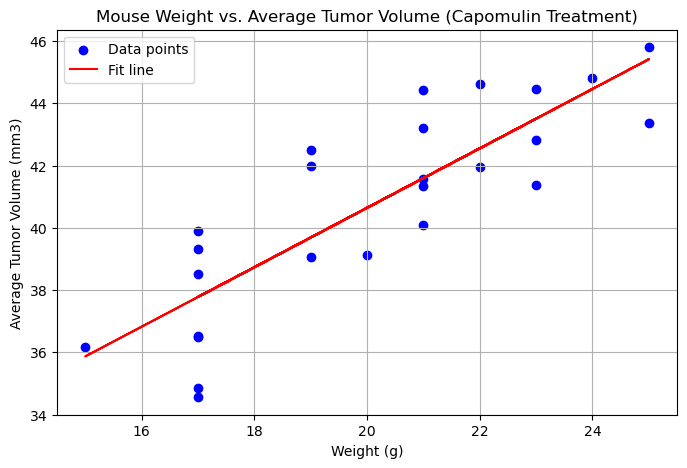

Slope: 0.9544396890241049
Intercept: 21.552160532685008
R-squared Value: 0.7088568047708723
P-value: 1.3225722434712404e-07
Standard Error: 0.12754359033201323


In [42]:
from scipy.stats import linregress

# Filter the data for the Capomulin treatment regimen
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]

# Group by Mouse ID to calculate the average tumor volume and weight per mouse
avg_tumor_volume = capomulin_data.groupby("Mouse ID")[["Weight (g)", "Tumor Volume (mm3)"]].mean()

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = avg_tumor_volume["Weight (g)"].corr(avg_tumor_volume["Tumor Volume (mm3)"])
print(f"Correlation coefficient: {correlation}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(
    avg_tumor_volume["Weight (g)"], avg_tumor_volume["Tumor Volume (mm3)"]
)

# Generate the scatter plot with the regression line
plt.figure(figsize=(8, 5))
plt.scatter(avg_tumor_volume["Weight (g)"], avg_tumor_volume["Tumor Volume (mm3)"], color='blue', label='Data points')
plt.plot(avg_tumor_volume["Weight (g)"], intercept + slope * avg_tumor_volume["Weight (g)"], color='red', label='Fit line')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Treatment)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Print the linear regression statistics
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared Value: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")
